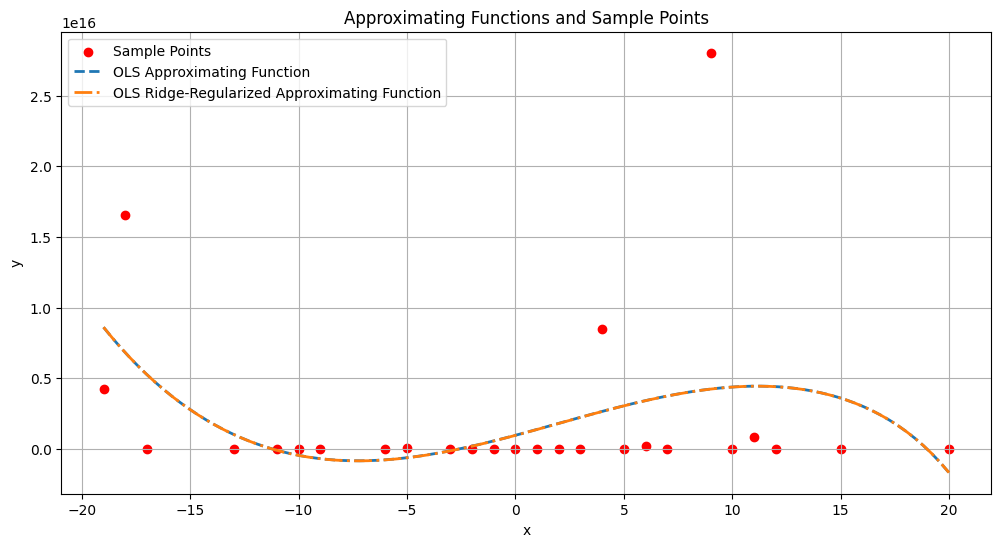

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sample points
sample_points = {
    0: 0, -6: 7.82, -9: 17799785926.18, 10: 2221594723631.01, 20: 6819175118346.83, 
    9: 28037811821600732, -10: 1788190954055.15, -3: 7568864532482.42, 2: 4752484.4, 
    -17: 25645.07, -19: 4207777612053281.5, -18: 16547059033610060, 4: 8505637926636156, 
    -1: 103227064.87, 5: 7.12, 3: 1477580847.1, 1: 3182995.87, 7: 31.47, 15: 92684818659.05, 
    11: 827841620697645.9, -13: 21359769490252.33, 6: 180821105763938.8, -11: 13244504949.13, 
    -2: 23085441786020.65, 12: 44187.22, -5: 56093545954370.12, 
    }

# Extract x and y values from sample points
x_values = np.array(list(sample_points.keys()))
y_values = np.array(list(sample_points.values()))

# Construct the design matrix X
X = np.column_stack([x_values**i for i in range(13)])

# OLS estimate
alpha_ols = np.linalg.inv(X.T @ X) @ X.T @ y_values

# Ridge regularization parameter
lambda_value = 0.1

# OLS ridge-regularized estimate
alpha_ridge = np.linalg.inv(X.T @ X + lambda_value * np.eye(13)) @ X.T @ y_values

# Generate x values for plotting
x_range = np.linspace(min(x_values), max(x_values), 100)

# Compute y values for the polynomial models
y_ols = np.dot(np.column_stack([x_range**i for i in range(13)]), alpha_ols)
y_ridge = np.dot(np.column_stack([x_range**i for i in range(13)]), alpha_ridge)

# Plot the graphs
plt.figure(figsize=(12, 6))
plt.scatter(x_values, y_values, color='red', label='Sample Points')
plt.plot(x_range, y_ols, label='OLS Approximating Function', linestyle='--', linewidth=2)
plt.plot(x_range, y_ridge, label='OLS Ridge-Regularized Approximating Function', linestyle='-.', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximating Functions and Sample Points')
plt.legend()
plt.grid(True)
plt.show()
